# **Credit Card Consumption**


*Presented by: Andrés Pérez Narváez*



##Importar librerías a usar y cargar BD


In [4]:
#Importar librerias importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Normalizar data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
#Cargar data
df= pd.read_excel("infoclientebanca.xlsx")


In [6]:
df.info()
#Podemos observar que contamos con el total de la data, cada columna tiene 47871 filas. No hay espacios vacíos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47871 entries, 0 to 47870
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   CLIENTE                                  47871 non-null  int64  
 1   grupo_de_cliente                         47871 non-null  object 
 2   Numero_de_transacciones                  47871 non-null  int64  
 3   promedio_por_transaccion                 47871 non-null  float64
 4   transaccion_minima                       47871 non-null  float64
 5   transaccion_maxima                       47871 non-null  float64
 6   desviacion_estandar_por_transaccion      47871 non-null  float64
 7   porcentaje_visa_nacional                 47871 non-null  float64
 8   porcentaje_visa_internacional            47871 non-null  float64
 9   porcentaje_mastercard_nacional           47871 non-null  float64
 10  porcentaje_mastercard_internacional      47871

## Data exploring


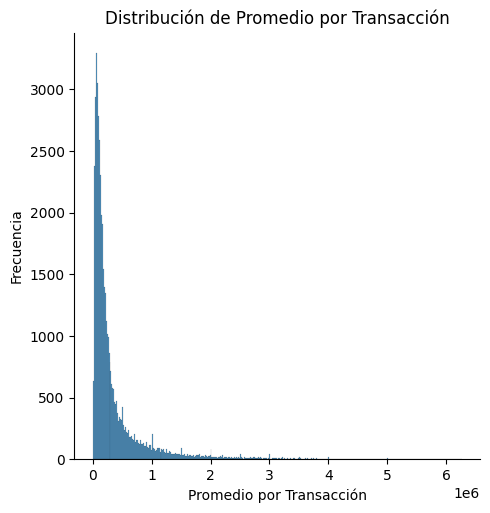

In [7]:
#Promedio por transacción
sns.displot(df["promedio_por_transaccion"])
plt.title('Distribución de Promedio por Transacción')
plt.xlabel('Promedio por Transacción')
plt.ylabel('Frecuencia')
# Mostrar el displot
plt.show()

<Axes: >

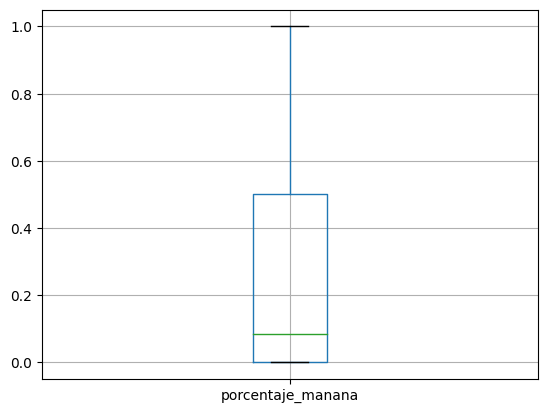

In [8]:
#Utilización de noche
df.boxplot(column='porcentaje_manana')


<Axes: >

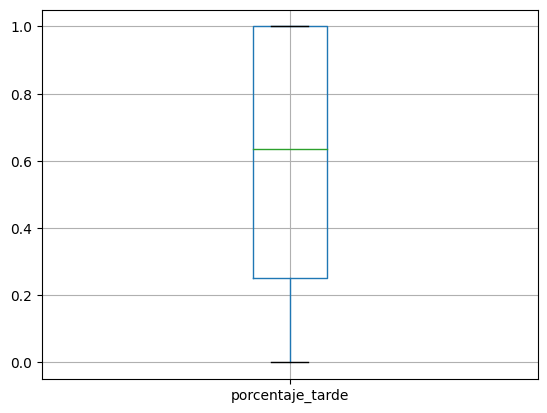

In [9]:
#Utilización de tarde
df.boxplot(column='porcentaje_tarde')

<Axes: >

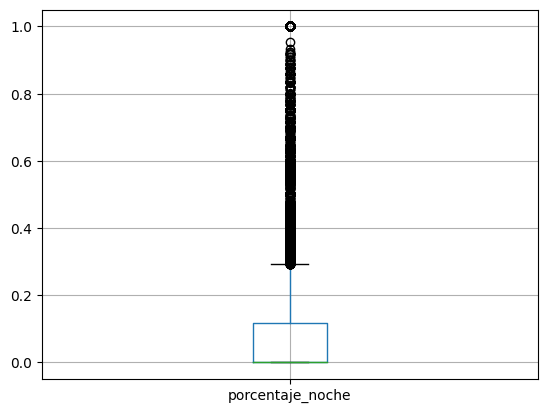

In [10]:
#Utilización de noche
df.boxplot(column='porcentaje_noche')

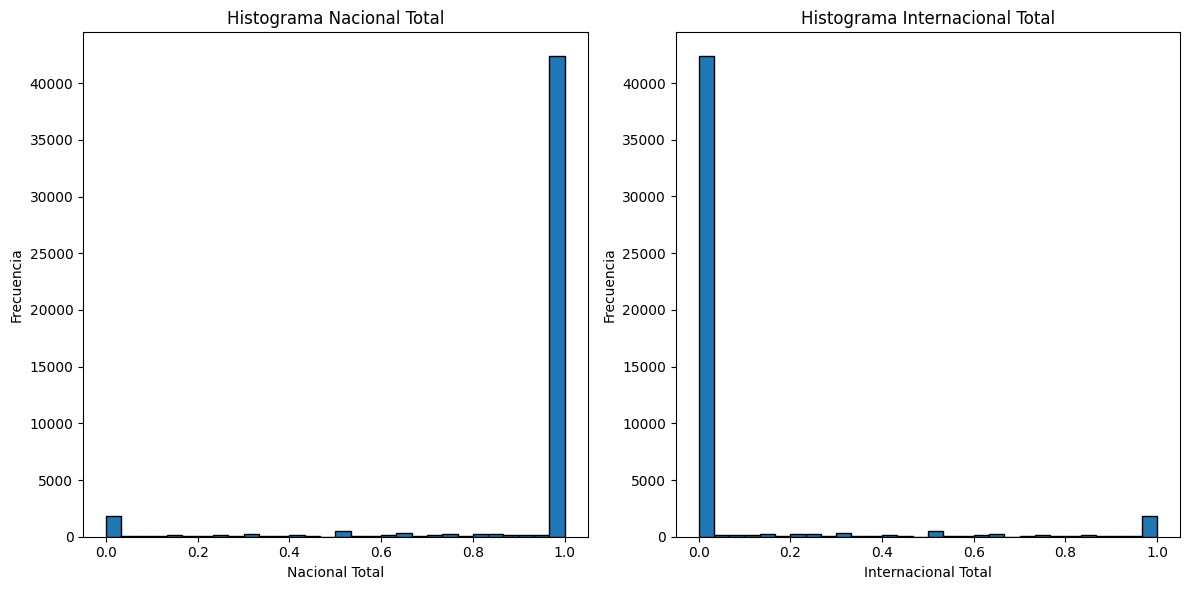

In [11]:
plt.figure(figsize=(12, 6))

# Subgráfico 1
plt.subplot(121)
plt.hist(df['porcentaje_nacional_total'], bins=30, edgecolor='black')
plt.xlabel('Nacional Total')
plt.ylabel('Frecuencia')
plt.title('Histograma Nacional Total')

# Subgráfico 2
plt.subplot(122)
plt.hist(df['porcentaje_internacional_total'], bins=30, edgecolor='black')
plt.xlabel('Internacional Total')
plt.ylabel('Frecuencia')
plt.title('Histograma Internacional Total')

plt.tight_layout()
plt.show()

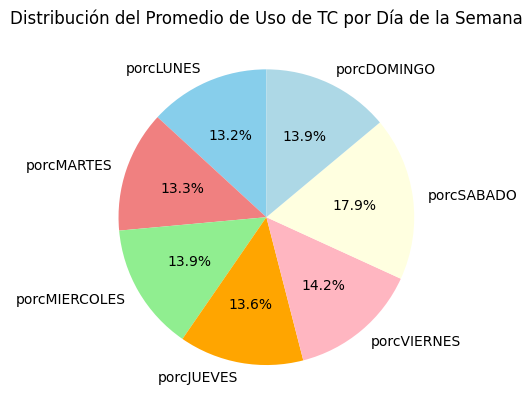

In [12]:
#Promedio de Uso de TC por Día de la Semana
columnas_dias = ['porcLUNES', 'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES', 'porcSABADO','porcDOMINGO']
df_dias = df[columnas_dias]

# Calcular el promedio de uso para cada día
promedio_dias = df_dias.mean()
plt.pie(promedio_dias, labels=promedio_dias.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink', 'lightyellow', 'lightblue'])
plt.title('Distribución del Promedio de Uso de TC por Día de la Semana')

# Mostrar el gráfico
plt.show()

##Eliminar columna que no se analizarán

<ipython-input-13-92b1cb1f25a4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


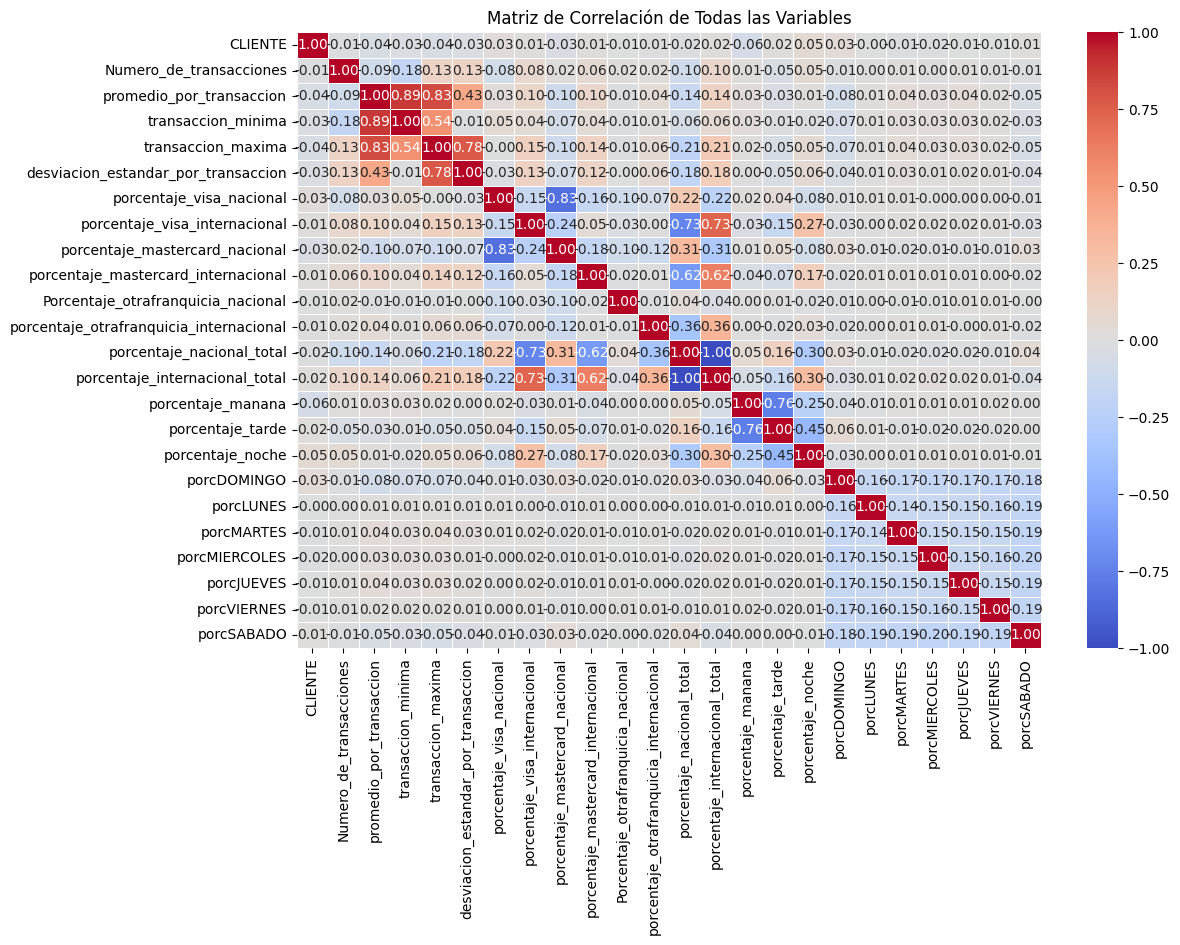

In [13]:
#matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor con la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Todas las Variables')
plt.show()



In [14]:
#Antes de llevar a cabo cualquier análisis de eliminan columnas que no harán parte de las carácteristicas que se desean analizar

#Eliminar
df = df.drop(['CLIENTE'],axis=1)

df = df.drop(['grupo_de_cliente'],axis=1)

df = df.drop(['Sitio_consumo_masfrecuente'],axis=1)

df = df.drop(['transaccion_minima'],axis=1)

df = df.drop(['transaccion_maxima'],axis=1)

df = df.drop(['porcentaje_visa_internacional'],axis=1)

df = df.drop(['porcentaje_mastercard_internacional'],axis=1)

df = df.drop(['porcentaje_otrafranquicia_internacional'],axis=1)


## Normalizar data

In [15]:
df.describe()
df.info()
#Acá observamos los estadísticos de cada columna, y se examina que los valores entre columnas varían mucho entre ellos, por lo que antes de cualquier análsis se deben normalizar los valores, de manera que los datos se encuentren dentro del mismo rango.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47871 entries, 0 to 47870
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Numero_de_transacciones              47871 non-null  int64  
 1   promedio_por_transaccion             47871 non-null  float64
 2   desviacion_estandar_por_transaccion  47871 non-null  float64
 3   porcentaje_visa_nacional             47871 non-null  float64
 4   porcentaje_mastercard_nacional       47871 non-null  float64
 5   Porcentaje_otrafranquicia_nacional   47871 non-null  float64
 6   porcentaje_nacional_total            47871 non-null  float64
 7   porcentaje_internacional_total       47871 non-null  float64
 8   porcentaje_manana                    47871 non-null  float64
 9   porcentaje_tarde                     47871 non-null  float64
 10  porcentaje_noche                     47871 non-null  float64
 11  porcDOMINGO                 

In [16]:
#Transformar datos: Datos en un mismo rango, ahora debo saber cuales son los datos más importantes
sc= StandardScaler()
#Ajusta la escala y la distribución de los datos.
data_sc= sc.fit_transform(df)


## PCA


In [17]:
pca=PCA(n_components=10)
data_pca=pca.fit_transform(data_sc)
print(pca.explained_variance_ratio_.cumsum())
# La suma acumulada de los porcentajes indica que los primeras 10 componentes principales explican el 80.15% de la varianza total del conjunto de datos original.

[0.141681   0.24418585 0.34081198 0.41700851 0.48359779 0.54819442
 0.61216056 0.67594596 0.73948591 0.80262388]


In [18]:
print(pca.components_)

[[ 1.01291722e-01  1.95685262e-01  2.36079624e-01 -5.31503313e-02
  -2.52909753e-01 -1.28576285e-02 -5.69305071e-01  5.69305071e-01
   4.39732679e-02 -2.54285451e-01  3.17662277e-01 -7.24420221e-02
   9.77509951e-03  3.82592936e-02  3.74392321e-02  3.11398916e-02
   2.41481604e-02 -5.72518281e-02]
 [-1.22328402e-01  1.08186691e-01  3.06145576e-02  7.07624979e-01
  -6.50568244e-01 -3.57251336e-04  6.99191055e-02 -6.99191055e-02
  -6.76458071e-02  1.33526572e-01 -1.05609173e-01 -2.95292397e-02
   2.53795376e-02  3.31501489e-02  5.54281315e-03  1.28479385e-02
   8.16617157e-03 -4.69936607e-02]
 [ 1.42409020e-02  1.14134080e-02  4.36966291e-02 -1.26389164e-01
   3.11077021e-02 -3.52357646e-03 -1.71514748e-01  1.71514748e-01
  -6.96353136e-01  6.50740947e-01 -1.10459426e-02  9.55905430e-02
   2.96150361e-02 -1.79501605e-02 -2.56958172e-02 -1.85355949e-02
  -4.05423363e-02 -2.21534311e-02]
 [-2.49454579e-02  6.02514327e-01  5.48694724e-01 -9.28155369e-02
   1.58588002e-01  6.11218764e-03  1.

In [19]:
matriz_carga = [
    [1.01291722e-01, 1.95685262e-01, 2.36079624e-01, -5.31503313e-02, -2.52909753e-01, -1.28576285e-02, -5.69305071e-01, 5.69305071e-01, 4.39732679e-02, -2.54285451e-01, 3.17662277e-01, -7.24420221e-02, 9.77509951e-03, 3.82592936e-02, 3.74392321e-02, 3.11398916e-02, 2.41481604e-02, -5.72518281e-02],
    [-1.22328402e-01, 1.08186691e-01, 3.06145576e-02, 7.07624979e-01, -6.50568244e-01, -3.57251336e-04, 6.99191055e-02, -6.99191055e-02, -6.76458071e-02, 1.33526572e-01, -1.05609173e-01, -2.95292397e-02, 2.53795376e-02, 3.31501489e-02, 5.54281315e-03, 1.28479385e-02, 8.16617157e-03, -4.69936607e-02],
    [1.42409020e-02, 1.14134080e-02, 4.36966291e-02, -1.26389164e-01, 3.11077021e-02, -3.52357646e-03, -1.71514748e-01, 1.71514748e-01, -6.96353136e-01, 6.50740947e-01, -1.10459426e-02, 9.55905430e-02, 2.96150361e-02, -1.79501605e-02, -2.56958172e-02, -1.85355949e-02, -4.05423363e-02, -2.21534311e-02],
    [-2.49454579e-02, 6.02514327e-01, 5.48694724e-01, -9.28155369e-02, 1.58588002e-01, 6.11218764e-03, 1.28921697e-01, -1.28921697e-01, 7.21976397e-02, 1.13529140e-01, -2.67953808e-01, -2.52715208e-01, 3.99486647e-02, 1.48816187e-01, 1.08993708e-01, 1.39972010e-01, 8.59456994e-02, -2.27768023e-01],
    [-5.65013972e-02, 1.83134854e-01, 1.75577380e-01, 4.68441465e-03, -4.68315560e-03, -6.14907522e-03, -2.67760944e-03, 2.67760944e-03, -4.09702245e-03, 2.99289503e-02, -3.88696921e-02, -2.16583264e-01, -1.86138657e-01, -1.19868192e-01, -2.62817669e-01, -1.48900008e-01, -4.19883377e-02, 8.60808191e-01],
    [5.36924620e-02, -4.98870105e-02, -2.87350304e-02, -2.41579672e-03, -1.99873597e-02, 1.06417050e-01, 9.26698679e-04, -9.26698679e-04, -3.26144221e-02, 2.15147188e-02, 1.28090340e-02, -4.42903337e-02, -3.00921975e-01, -2.73954037e-01, -3.22660354e-01, 2.59540628e-01, 7.93395025e-01, -1.08936782e-01],
    [2.85640819e-02, 4.27666484e-02, 8.01808901e-02, -8.58663209e-03, 1.04049542e-02, -1.65534005e-02, -2.77972692e-03, 2.77972692e-03, 5.78109443e-02, -2.60099557e-02, -4.07333124e-02, 2.13010863e-01, 4.91725200e-01, 2.93374177e-01, -6.77404436e-01, -3.55278978e-01, 1.38616981e-01, -8.50090971e-02],
    [3.69119435e-02, -8.29238086e-03, 1.29710850e-02, 3.22610972e-03, -7.28485107e-03, 4.54992396e-02, 1.04054659e-02, -1.04054659e-02, 5.28044871e-03, -2.15759825e-02, 2.48254420e-02, 9.33664086e-02, -3.87608393e-02, 7.24773418e-02, -4.56252869e-01, 7.66342373e-01, -4.28974250e-01, 1.30688257e-03],
    [1.37050924e-02, -5.35142144e-02, -7.24050970e-02, -5.13125071e-03, -6.38175610e-04, 8.33273528e-02, 2.26937587e-02, -2.26937587e-02, -5.33395621e-02, -7.02757095e-03, 8.37105066e-02, -4.63577344e-01, 7.00766826e-01, -4.86679468e-01, 4.14706805e-02, 1.65007260e-01, 1.88274593e-02, 4.08297579e-02],
    [-6.10987941e-02, 1.92588881e-01, 2.11403014e-01, 1.41533761e-03, -6.05802541e-03, -3.30435133e-02, -2.18044851e-02, 2.18044851e-02, 1.24599979e-01, -2.07339881e-02, -1.40312555e-01, 6.61799351e-01, 6.71029753e-02, -6.49283682e-01, 3.42165485e-02, -4.33591679e-02, -9.81686270e-02, -4.77000731e-03]
]

# Lista con los nombres de las variables originales (podrían ser los nombres de tus columnas)
nombres_variables = ["Var1", "Var2", "Var3", "Var4", "Var5", "Var6", "Var7", "Var8", "Var9", "Var10", "Var11", "Var12", "Var13", "Var14", "Var15", "Var16", "Var17", "Var18"]
# Convertir la matriz de carga en un DataFrame
df_matriz_carga = pd.DataFrame(matriz_carga, columns=nombres_variables)
# Mostrar el DataFrame
print(df_matriz_carga)

       Var1      Var2      Var3      Var4      Var5      Var6      Var7  \
0  0.101292  0.195685  0.236080 -0.053150 -0.252910 -0.012858 -0.569305   
1 -0.122328  0.108187  0.030615  0.707625 -0.650568 -0.000357  0.069919   
2  0.014241  0.011413  0.043697 -0.126389  0.031108 -0.003524 -0.171515   
3 -0.024945  0.602514  0.548695 -0.092816  0.158588  0.006112  0.128922   
4 -0.056501  0.183135  0.175577  0.004684 -0.004683 -0.006149 -0.002678   
5  0.053692 -0.049887 -0.028735 -0.002416 -0.019987  0.106417  0.000927   
6  0.028564  0.042767  0.080181 -0.008587  0.010405 -0.016553 -0.002780   
7  0.036912 -0.008292  0.012971  0.003226 -0.007285  0.045499  0.010405   
8  0.013705 -0.053514 -0.072405 -0.005131 -0.000638  0.083327  0.022694   
9 -0.061099  0.192589  0.211403  0.001415 -0.006058 -0.033044 -0.021804   

       Var8      Var9     Var10     Var11     Var12     Var13     Var14  \
0  0.569305  0.043973 -0.254285  0.317662 -0.072442  0.009775  0.038259   
1 -0.069919 -0.067646  0

In [20]:
import tabulate

# Nuevos nombres de las variables
nombres_variables_nuevos = [
    'Numero_de_transacciones', 'promedio_por_transaccion', 'desviacion_estandar_por_transaccion',
    'porcentaje_visa_nacional', 'porcentaje_mastercard_nacional', 'Porcentaje_otrafranquicia_nacional',
    'porcentaje_nacional_total', 'porcentaje_internacional_total', 'porcentaje_manana',
    'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES', 'porcMARTES',
    'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES', 'porcSABADO'
]

# Asignar nuevos nombres a las columnas del DataFrame
df_matriz_carga.columns = nombres_variables_nuevos

# Encontrar las tres columnas más representativas para cada fila (solo valores positivos)
columnas_mas_representativas = df_matriz_carga.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

# Crear un DataFrame con las tres columnas más representativas para cada fila
df_columnas_representativas = pd.DataFrame({
    'Fila/Componente': df_matriz_carga.index,
    'Variables Representativas': columnas_mas_representativas.values
})

# Imprimir la tabla de manera más bonita
tabla_bonita = tabulate.tabulate(df_columnas_representativas, headers='keys', tablefmt='pretty', showindex=False)

print(tabla_bonita)

+-----------------+-------------------------------------------------------------------------------------------------------+
| Fila/Componente |                                       Variables Representativas                                       |
+-----------------+-------------------------------------------------------------------------------------------------------+
|        0        |     ['porcentaje_internacional_total', 'porcentaje_noche', 'desviacion_estandar_por_transaccion']     |
|        1        |             ['porcentaje_visa_nacional', 'porcentaje_tarde', 'promedio_por_transaccion']              |
|        2        |                 ['porcentaje_tarde', 'porcentaje_internacional_total', 'porcDOMINGO']                 |
|        3        | ['promedio_por_transaccion', 'desviacion_estandar_por_transaccion', 'porcentaje_mastercard_nacional'] |
|        4        |           ['porcSABADO', 'promedio_por_transaccion', 'desviacion_estandar_por_transaccion']           |
|       

## Búsquedad de la cantidad óptima de clusters -**Método del codo (Elbow)**
En el análisis de Clustering, uno de los objetivos principales es determinar la cantidad de grupos (clusters) que se deben formar. Para lograr esto, se calcula qué tan similares son los individuos dentro de los clusters. Si los individuos son más similares, los clusters estarán más distantes entre sí. Este es el resultado deseado en el Clustering: **formar grupos bien delimitados que contengan individuos cuya distancia entre ellos sea la menor posible.**
Para medir esta distancia, se utiliza la suma de los cuadrados dentro de cada grupo, también conocida como WCSS. Este valor se calcula sumando la distancia euclidiana al cuadrado entre cada punto y el centroide de su respectivo cluster. **El objetivo es minimizar el valor de WCSS**, lo que significa que los puntos dentro de cada cluster son más similares entre sí y, por lo tanto, los clusters están más distantes entre sí.

In [21]:
# Se inicializa una lista vacía para almacenar los valores de WCSS para cada número de clusters
wcss = []

# Se inicia un bucle for que recorre un rango de 1 a 10 (el número 11 no está incluido)
for i in range(1, 11):
    # Se crea una instancia de KMeans para cada valor de i (número de clusters)

    kmeans = KMeans(n_clusters=i, random_state=123)

    # Se ajusta el modelo KMeans a los datos estandarizados
    kmeans.fit(data_pca)

    # Se calcula la inercia del modelo KMeans (que es la suma de los cuadrados dentro de cada grupo)
    # y se agrega a la lista wcss
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

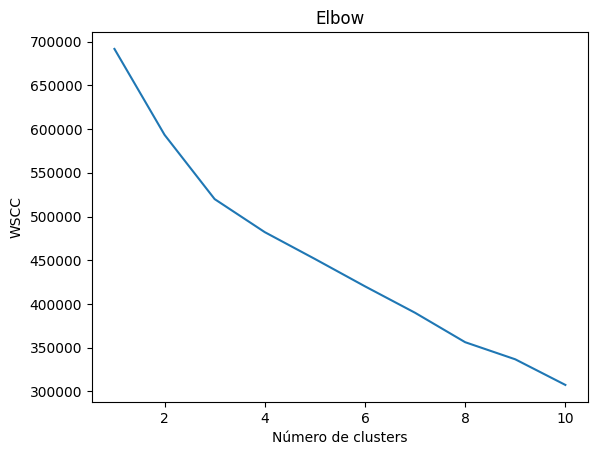

In [22]:
# Grafica de los resultados WCSS para forma el codo

plt.plot (range(1,11), wcss)
plt.title ("Elbow")
plt.xlabel ("Número de clusters")
plt.ylabel ("WSCC") #Es un indicador de que tan similares son los individuos dentro de los clusters
plt.show()

#Interpretación: El valor WCSS va disminuyendo a medida que aumentan los clusters, de manera que al llegar a los 11 clusters el valor de WSCC es muy pequeño en comparación con un 1 solo cluster.
#Sin embargo se estarían haciendo demasiadas particiones, por tanto se buscará un punto en donde la tasa de cambio sea leve, para ello haremos uso del coeficiente de la silueta para determinar la cantidad de clusters a formar.


## Coeficiente de silueta

El coeficiente de Silueta es una métrica para evaluar la calidad del agrupamiento obtenido con
algoritmos de clustering. El objetivo de Silueta es identificar cuál es el número óptimo de
agrupamientos.



In [48]:
silueta=[]
for i in range(2,11):
  cluster=KMeans(n_clusters=i,random_state=123)#Aleatorización de los datos
  cluster.fit(data_pca)
  silueta.append(silhouette_score(data_pca, cluster.predict(data_pca)))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

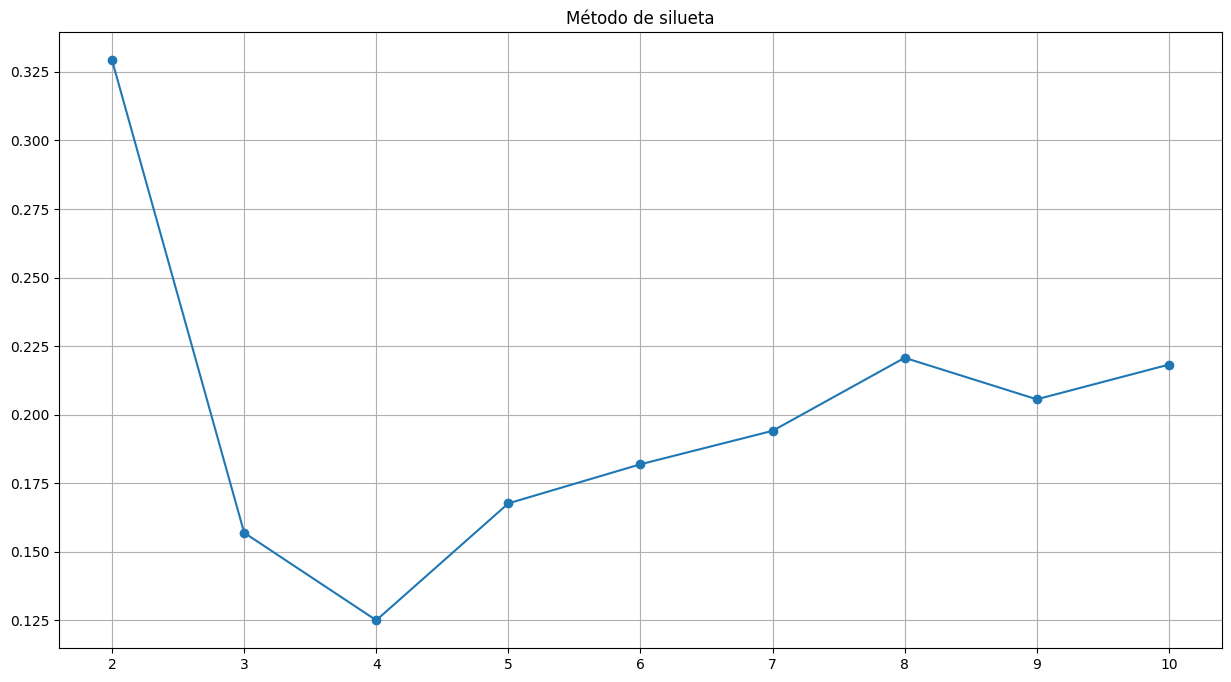

In [49]:
plt.figure(figsize=(15, 8))
plt.plot(range(2, 11), silueta, marker='o')
plt.title("Método de silueta")
plt.grid(True)  # Agregar cuadrícula
plt.show()

In [50]:
print(silhouette_score(data_pca,cluster.predict(data_pca)))

0.21825170741711306




##**Aplicando el método de k-means a la base de datos**


In [23]:
#Crear modelo
clustering =KMeans(n_clusters=7, random_state=123)
clustering.fit(data_pca)
print(clustering.labels_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 0 5 ... 3 4 2]


In [62]:
data_pca = pd.DataFrame(data_pca, columns=["pca1", "pca2", "pca3", "pca4", "pca5", "pca6", "pca7", "pca8", "pca9", "pca10"])
data_pca['labels'] = clustering.labels_

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,labels
0,6.384988,-0.688424,0.924017,-1.855036,-0.626739,-1.017134,0.947489,0.276036,-1.688578,-2.799552,3
1,-0.419236,2.339831,0.972666,0.529587,-0.480544,-0.428185,0.747963,0.821932,1.904737,0.209188,0
2,0.284769,1.741574,-2.772280,0.253539,-0.981426,-1.308658,-2.358038,-1.646997,0.005312,0.493183,5
3,-0.725211,-1.311380,-0.097880,0.375310,-0.404077,-0.828860,1.231381,0.256998,1.262810,-0.371750,0
4,-1.002490,2.115483,1.226278,-1.259327,-0.781430,-0.124264,0.636878,0.288371,-1.648738,2.250399,6
...,...,...,...,...,...,...,...,...,...,...,...
47866,0.070202,1.765797,-2.760265,-0.187956,-0.638020,-1.116356,1.184155,0.301306,-1.927136,-2.254518,1
47867,5.467717,-0.716379,0.964265,-1.726212,-0.279567,1.150754,-0.599846,0.680629,0.180627,-0.196639,3
47868,3.184196,-0.304920,0.666480,-1.308290,0.058463,0.484874,0.112180,0.367797,-0.538361,-0.230770,3
47869,-1.008154,2.024954,0.808544,-1.338168,2.715226,-0.300177,-0.416721,-0.037323,0.159969,-0.204259,4


In [25]:
#Perfilar al cliente
for label, data in data_pca.groupby("labels"):
    print(f"Cluster: {label}")
    print(data.head())

Cluster: 0
        pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
1  -0.419236  2.339831  0.972666  0.529587 -0.480544 -0.428185  0.747963   
3  -0.725211 -1.311380 -0.097880  0.375310 -0.404077 -0.828860  1.231381   
8   1.082004  2.355335 -2.515864  2.847834  0.158476 -1.505201  2.178357   
60 -0.744799  2.295682  0.994501 -0.322879 -0.745217 -1.090714  1.721605   
66 -0.691017 -1.258879 -0.498189  0.511416 -0.897950 -1.230186 -0.260775   

        pca8      pca9     pca10  labels  
1   0.821932  1.904737  0.209188       0  
3   0.256998  1.262810 -0.371750       0  
8  -0.164837  2.238795  1.542019       0  
60 -0.189372  2.657375  0.104004       0  
66 -0.934529  1.337730  0.278290       0  
Cluster: 1
        pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
5   1.734401  2.629035 -0.651916  5.165421  1.179668  0.493613  1.755738   
12 -0.254284  1.980163  0.089406  0.098135 -0.461074 -0.132581 -0.609945   
13 -0.102979  1.100759 -1.885985 -0

In [49]:
tabla_descriptiva = data_pca.groupby("labels").describe().style.format("{:.2f}")
tabla_descriptiva


###**Perfilando Clientes**

In [27]:
cluster1 = df[data_pca['labels'] == 0]
cluster2 = df[data_pca['labels'] == 1]
cluster3 = df[data_pca['labels'] == 2]
cluster4 = df[data_pca['labels'] == 3]
cluster5 = df[data_pca['labels'] == 4]
cluster6 = df[data_pca['labels'] == 5]
cluster7 = df[data_pca['labels'] == 6]


Cantidad de clientes por cluster

In [28]:
nombres_clusters = ['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6', 'cluster7']

# Crear un DataFrame vacío para almacenar las frecuencias
tabla_frecuencias = pd.DataFrame(index=nombres_clusters, columns=['Frecuencia'])
for nombre_cluster in nombres_clusters:
    frecuencia = globals()[nombre_cluster].count().iloc[0]  # Obtener la frecuencia del cluster
    tabla_frecuencias.loc[nombre_cluster, 'Frecuencia'] = frecuencia

# Mostrar la tabla de frecuencias
print(tabla_frecuencias)

         Frecuencia
cluster1       4388
cluster2       9529
cluster3      14910
cluster4       3779
cluster5       5873
cluster6       4246
cluster7       5146


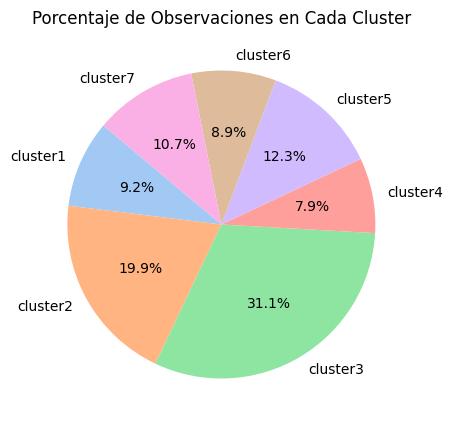

In [29]:
# Datos de la tabla
clusters = ['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6', 'cluster7']
cantidades = [4388, 9529, 14910, 3779, 5873, 4246, 5146]

# Calcular porcentajes directamente desde las cantidades
total = sum(cantidades)
porcentajes = [(cantidad / total) * 100 for cantidad in cantidades]

# Paleta de colores pastel
colores_pastel = sns.color_palette('pastel')

# Crear un gráfico de pastel con colores pastel
plt.figure(figsize=(5, 5))
plt.pie(cantidades, labels=clusters, autopct='%1.1f%%', startangle=140, colors=colores_pastel)
plt.title('Porcentaje de Observaciones en Cada Cluster')
plt.show()


**Cluster 1**

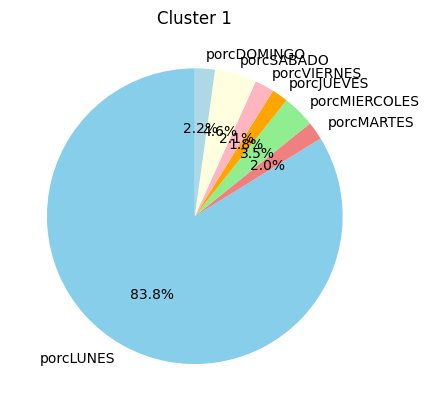

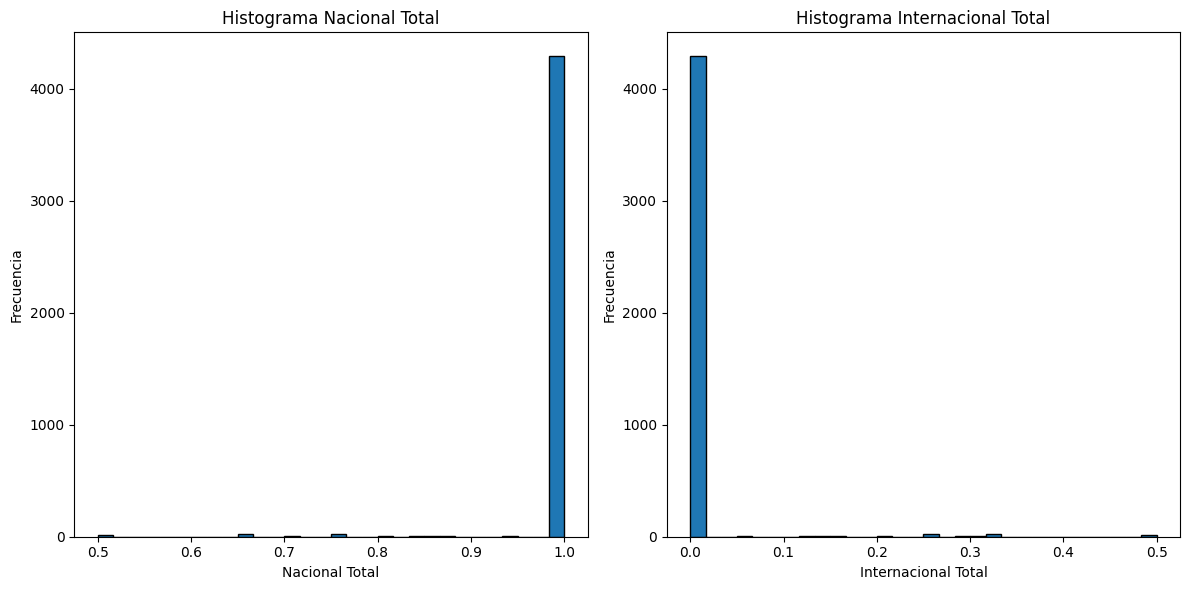

In [30]:
#Promedio de Uso de TC por Día de la Semana para el cluster 1
columnas_dias = ['porcLUNES', 'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES', 'porcSABADO','porcDOMINGO']
dias1 = cluster1[columnas_dias]

# Calcular el promedio de uso para cada día
promedio_dias = dias1.mean()
plt.pie(promedio_dias, labels=promedio_dias.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink', 'lightyellow', 'lightblue'])
plt.title('Cluster 1')

# Mostrar el gráfico
plt.show()

plt.figure(figsize=(12, 6))

# Subgráfico 1
plt.subplot(121)
plt.hist(cluster1['porcentaje_nacional_total'], bins=30, edgecolor='black')
plt.xlabel('Nacional Total')
plt.ylabel('Frecuencia')
plt.title('Histograma Nacional Total')

# Subgráfico 2
plt.subplot(122)
plt.hist(cluster1['porcentaje_internacional_total'], bins=30, edgecolor='black')
plt.xlabel('Internacional Total')
plt.ylabel('Frecuencia')
plt.title('Histograma Internacional Total')

plt.tight_layout()
plt.show()


In [42]:
cluster1.describe()

,Numero_de_transacciones,promedio_por_transaccion,desviacion_estandar_por_transaccion,porcentaje_visa_nacional,porcentaje_mastercard_nacional,Porcentaje_otrafranquicia_nacional,porcentaje_nacional_total,porcentaje_internacional_total,porcentaje_manana,porcentaje_tarde,porcentaje_noche,porcDOMINGO,porcLUNES,porcMARTES,porcMIERCOLES,porcJUEVES,porcVIERNES,porcSABADO
count,4388.000000,4.388000e+03,4.388000e+03,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000
mean,2.570647,3.982561e+05,9.963521e+04,0.420846,0.556834,0.015541,0.993222,0.006778,0.263177,0.631132,0.105692,0.021858,0.838040,0.019931,0.035489,0.017812,0.021164,0.045706
std,2.774855,6.198714e+05,2.508792e+05,0.431640,0.432353,0.107147,0.048068,0.048068,0.388528,0.422571,0.265658,0.083724,0.217980,0.079131,0.113459,0.074386,0.082259,0.126774
min,1.000000,4.900000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.722374e+04,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.622596,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.726003e+05,3.535530e+03,0.333333,0.555556,0.000000,1.000000,0.000000,0.000000,0.888889,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,4.215365e+05,7.868500e+04,1.000000,1.000000,0.000000,1.000000,0.000000,0.500000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.000000,5.775630e+06,3.079658e+06,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,0.500000,0.571429,0.500000


**Cluster 2**

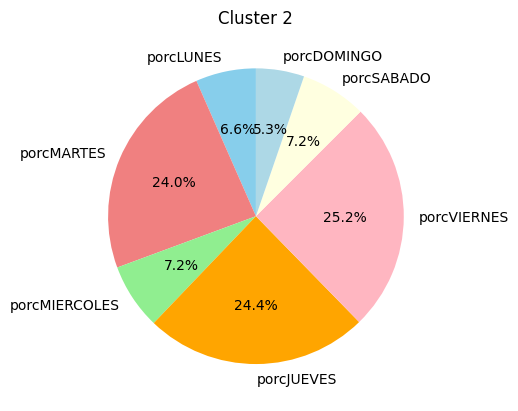

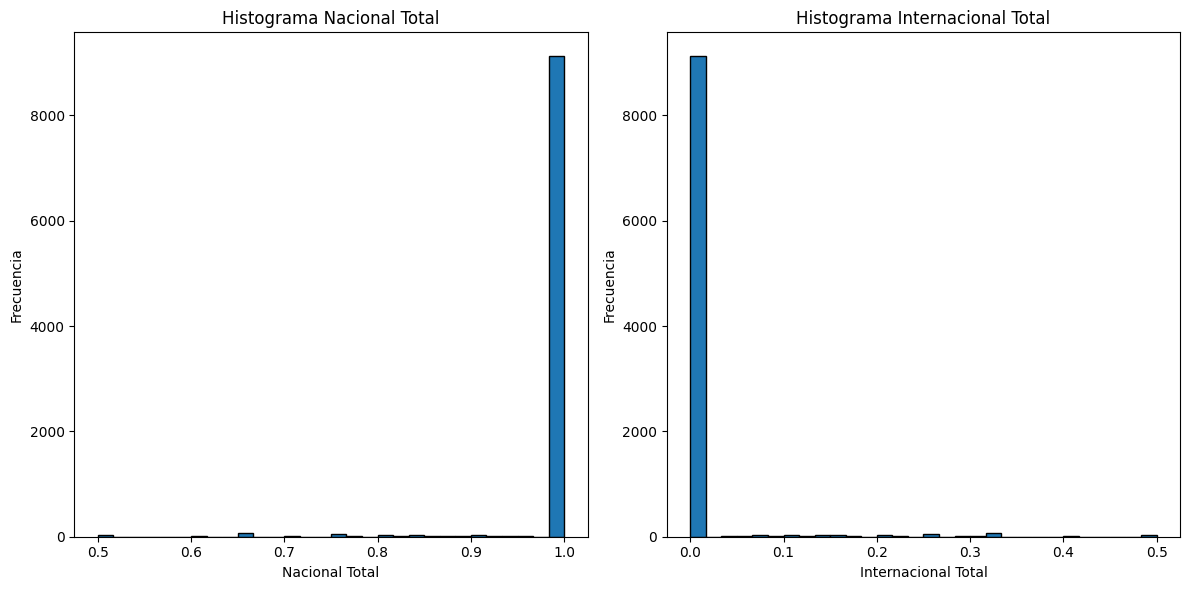

In [31]:
#Promedio de Uso de TC por Día de la Semana para el cluster 1
columnas_dias = ['porcLUNES', 'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES', 'porcSABADO','porcDOMINGO']
dias2 = cluster2[columnas_dias]

# Calcular el promedio de uso para cada día
promedio_dias = dias2.mean()
plt.pie(promedio_dias, labels=promedio_dias.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink', 'lightyellow', 'lightblue'])
plt.title('Cluster 2')

# Mostrar el gráfico
plt.show()

plt.figure(figsize=(12, 6))

# Subgráfico 1
plt.subplot(121)
plt.hist(cluster2['porcentaje_nacional_total'], bins=30, edgecolor='black')
plt.xlabel('Nacional Total')
plt.ylabel('Frecuencia')
plt.title('Histograma Nacional Total')

# Subgráfico 2
plt.subplot(122)
plt.hist(cluster2['porcentaje_internacional_total'], bins=30, edgecolor='black')
plt.xlabel('Internacional Total')
plt.ylabel('Frecuencia')
plt.title('Histograma Internacional Total')

plt.tight_layout()
plt.show()

In [43]:
cluster2.describe()

,Numero_de_transacciones,promedio_por_transaccion,desviacion_estandar_por_transaccion,porcentaje_visa_nacional,porcentaje_mastercard_nacional,Porcentaje_otrafranquicia_nacional,porcentaje_nacional_total,porcentaje_internacional_total,porcentaje_manana,porcentaje_tarde,porcentaje_noche,porcDOMINGO,porcLUNES,porcMARTES,porcMIERCOLES,porcJUEVES,porcVIERNES,porcSABADO
count,9529.000000,9.529000e+03,9.529000e+03,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000
mean,4.362577,4.108622e+05,1.585786e+05,0.856756,0.113712,0.019714,0.990182,0.009818,0.321419,0.579259,0.099322,0.052727,0.065985,0.240422,0.072154,0.244466,0.251965,0.072281
std,5.540935,6.303311e+05,3.401784e+05,0.206755,0.168993,0.120870,0.053008,0.053008,0.366315,0.384352,0.231007,0.122035,0.131280,0.352239,0.136915,0.350241,0.354786,0.141930
min,1.000000,1.000000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,8.362750e+04,0.000000e+00,0.666667,0.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.826000e+05,3.548756e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.200000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.333333e+05,1.435766e+05,1.000000,0.250000,0.000000,1.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.052632,0.375000,0.090909,0.400000,0.416667,0.062500
max,80.000000,6.148920e+06,4.330051e+06,1.000000,0.666667,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,0.750000,0.666667,1.000000,0.666667,1.000000,1.000000,0.666667



**Cluster 3**

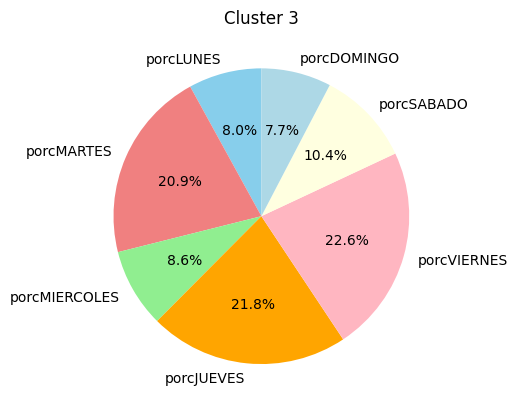

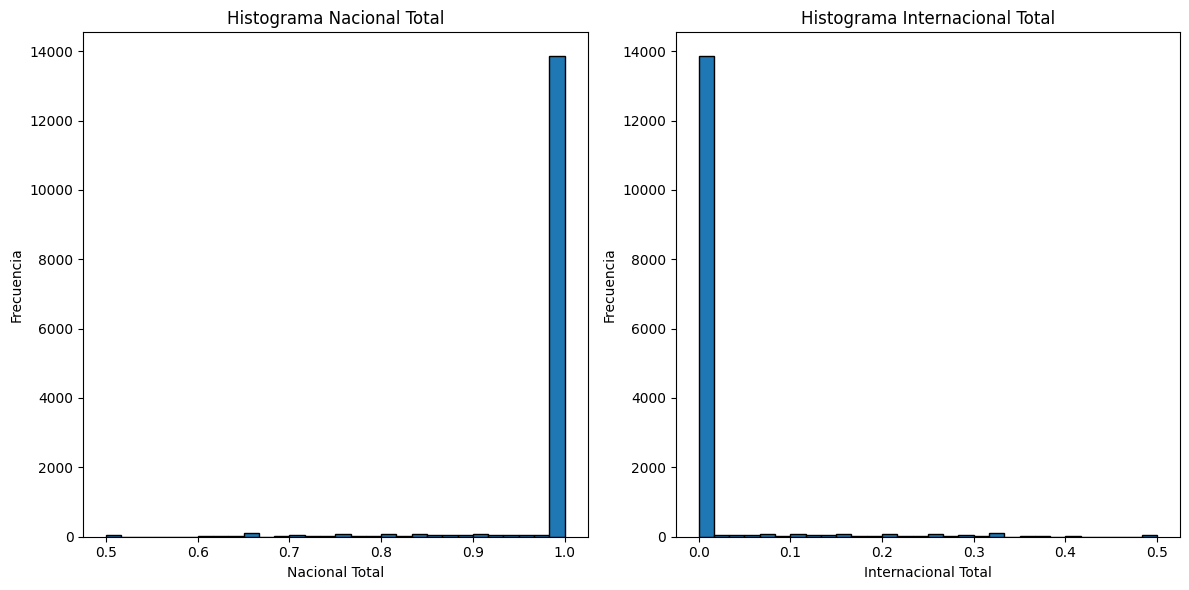

In [32]:
#Promedio de Uso de TC por Día de la Semana para el cluster 1
columnas_dias = ['porcLUNES', 'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES', 'porcSABADO','porcDOMINGO']
dias3 = cluster3[columnas_dias]

# Calcular el promedio de uso para cada día
promedio_dias = dias3.mean()
plt.pie(promedio_dias, labels=promedio_dias.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink', 'lightyellow', 'lightblue'])
plt.title('Cluster 3')

# Mostrar el gráfico
plt.show()

plt.figure(figsize=(12, 6))

# Subgráfico 1
plt.subplot(121)
plt.hist(cluster3['porcentaje_nacional_total'], bins=30, edgecolor='black')
plt.xlabel('Nacional Total')
plt.ylabel('Frecuencia')
plt.title('Histograma Nacional Total')

# Subgráfico 2
plt.subplot(122)
plt.hist(cluster3['porcentaje_internacional_total'], bins=30, edgecolor='black')
plt.xlabel('Internacional Total')
plt.ylabel('Frecuencia')
plt.title('Histograma Internacional Total')

plt.tight_layout()
plt.show()

In [44]:
cluster3.describe()

,Numero_de_transacciones,promedio_por_transaccion,desviacion_estandar_por_transaccion,porcentaje_visa_nacional,porcentaje_mastercard_nacional,Porcentaje_otrafranquicia_nacional,porcentaje_nacional_total,porcentaje_internacional_total,porcentaje_manana,porcentaje_tarde,porcentaje_noche,porcDOMINGO,porcLUNES,porcMARTES,porcMIERCOLES,porcJUEVES,porcVIERNES,porcSABADO
count,14910.000000,1.491000e+04,1.491000e+04,14910.000000,14910.000000,14910.000000,14910.000000,14910.000000,14910.000000,14910.000000,14910.000000,14910.000000,14910.000000,14910.000000,14910.000000,14910.000000,14910.000000,14910.000000
mean,8.087123,2.964437e+05,1.372756e+05,0.096237,0.874521,0.014962,0.985720,0.014280,0.302179,0.576366,0.121456,0.076514,0.079964,0.209140,0.086369,0.217854,0.226349,0.103809
std,12.096588,4.770727e+05,2.490737e+05,0.151570,0.179314,0.071268,0.060476,0.060476,0.329339,0.348943,0.232312,0.130114,0.128338,0.308147,0.135514,0.314031,0.318149,0.150176
min,1.000000,1.000000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,7.850210e+04,3.152805e+03,0.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1.474932e+05,5.633167e+04,0.000000,1.000000,0.000000,1.000000,0.000000,0.222222,0.600000,0.000000,0.000000,0.000000,0.055556,0.000000,0.071429,0.087719,0.000000
75%,9.000000,2.985000e+05,1.464022e+05,0.200000,1.000000,0.000000,1.000000,0.000000,0.500000,1.000000,0.157895,0.125000,0.142857,0.285714,0.153846,0.333333,0.333333,0.200000
max,142.000000,5.966212e+06,3.104428e+06,0.769912,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,0.600000,0.555556,1.000000,0.600000,1.000000,1.000000,0.657143



**Cluster 4**

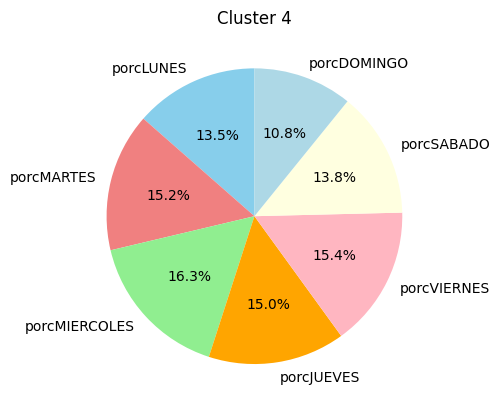

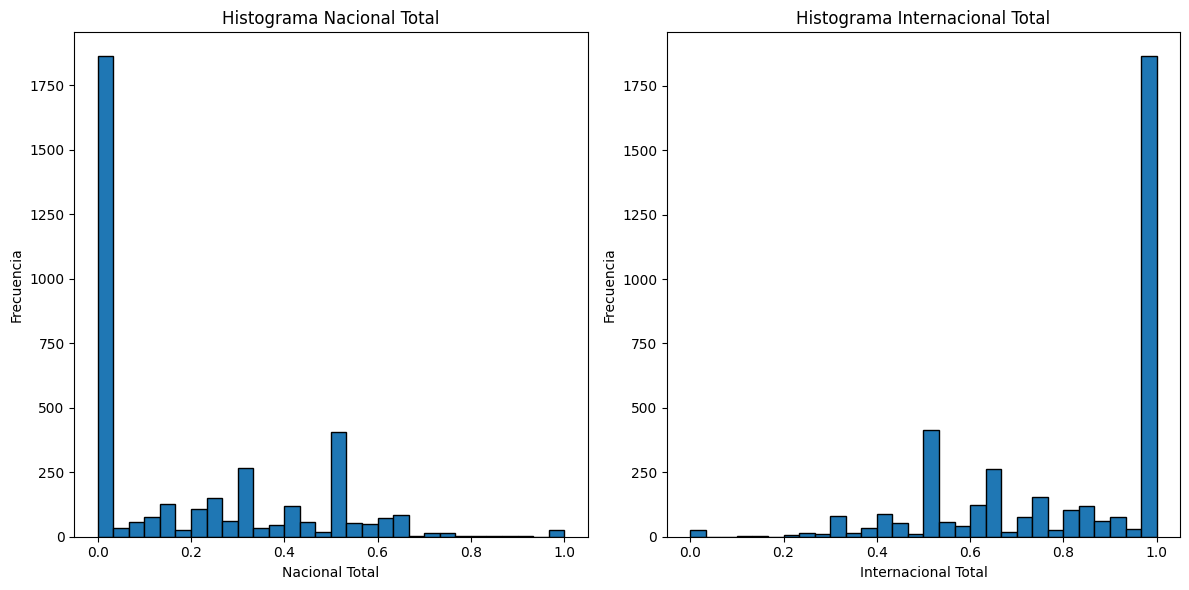

In [33]:
#Promedio de Uso de TC por Día de la Semana para el cluster 1
columnas_dias = ['porcLUNES', 'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES', 'porcSABADO','porcDOMINGO']
dias4 = cluster4[columnas_dias]

# Calcular el promedio de uso para cada día
promedio_dias = dias4.mean()
plt.pie(promedio_dias, labels=promedio_dias.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink', 'lightyellow', 'lightblue'])
plt.title('Cluster 4')

# Mostrar el gráfico
plt.show()

plt.figure(figsize=(12, 6))

# Subgráfico 1
plt.subplot(121)
plt.hist(cluster4['porcentaje_nacional_total'], bins=30, edgecolor='black')
plt.xlabel('Nacional Total')
plt.ylabel('Frecuencia')
plt.title('Histograma Nacional Total')

# Subgráfico 2
plt.subplot(122)
plt.hist(cluster4['porcentaje_internacional_total'], bins=30, edgecolor='black')
plt.xlabel('Internacional Total')
plt.ylabel('Frecuencia')
plt.title('Histograma Internacional Total')

plt.tight_layout()
plt.show()

In [45]:
cluster4.describe()

,Numero_de_transacciones,promedio_por_transaccion,desviacion_estandar_por_transaccion,porcentaje_visa_nacional,porcentaje_mastercard_nacional,Porcentaje_otrafranquicia_nacional,porcentaje_nacional_total,porcentaje_internacional_total,porcentaje_manana,porcentaje_tarde,porcentaje_noche,porcDOMINGO,porcLUNES,porcMARTES,porcMIERCOLES,porcJUEVES,porcVIERNES,porcSABADO
count,3779.000000,3.779000e+03,3.779000e+03,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000
mean,7.976713,7.029073e+05,4.168638e+05,0.085307,0.107424,0.002905,0.195636,0.804364,0.225818,0.375583,0.398599,0.108378,0.135292,0.151760,0.163076,0.149698,0.154043,0.137754
std,11.687704,7.837762e+05,6.558544e+05,0.156329,0.173580,0.026003,0.233340,0.233340,0.289273,0.326512,0.338609,0.211554,0.232118,0.236436,0.246715,0.237841,0.241758,0.235159
min,1.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.643677e+05,1.412370e+04,0.000000,0.000000,0.000000,0.000000,0.615385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.042279e+05,1.609340e+05,0.000000,0.000000,0.000000,0.062500,0.937500,0.125000,0.333333,0.363636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,9.414559e+05,5.310523e+05,0.125000,0.200000,0.000000,0.384615,1.000000,0.333333,0.558266,0.615385,0.142857,0.195122,0.234314,0.250000,0.222222,0.222222,0.200000
max,116.000000,6.262025e+06,5.419241e+06,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



**Cluster 5**

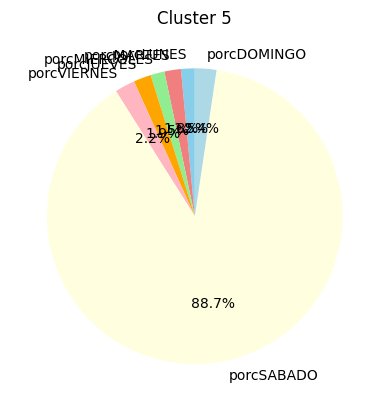

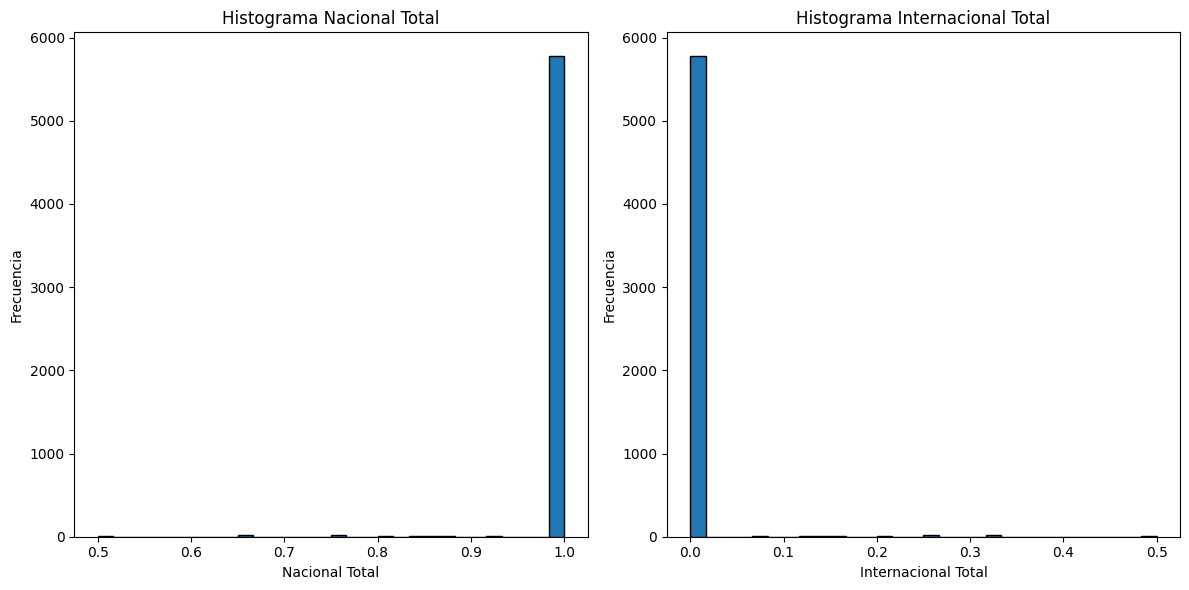

In [34]:
#Promedio de Uso de TC por Día de la Semana para el cluster 1
columnas_dias = ['porcLUNES', 'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES', 'porcSABADO','porcDOMINGO']
dias5 = cluster5[columnas_dias]

# Calcular el promedio de uso para cada día
promedio_dias = dias5.mean()
plt.pie(promedio_dias, labels=promedio_dias.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink', 'lightyellow', 'lightblue'])
plt.title('Cluster 5')

# Mostrar el gráfico
plt.show()

plt.figure(figsize=(12, 6))

# Subgráfico 1
plt.subplot(121)
plt.hist(cluster5['porcentaje_nacional_total'], bins=30, edgecolor='black')
plt.xlabel('Nacional Total')
plt.ylabel('Frecuencia')
plt.title('Histograma Nacional Total')

# Subgráfico 2
plt.subplot(122)
plt.hist(cluster5['porcentaje_internacional_total'], bins=30, edgecolor='black')
plt.xlabel('Internacional Total')
plt.ylabel('Frecuencia')
plt.title('Histograma Internacional Total')

plt.tight_layout()
plt.show()

In [46]:
cluster5.describe()

,Numero_de_transacciones,promedio_por_transaccion,desviacion_estandar_por_transaccion,porcentaje_visa_nacional,porcentaje_mastercard_nacional,Porcentaje_otrafranquicia_nacional,porcentaje_nacional_total,porcentaje_internacional_total,porcentaje_manana,porcentaje_tarde,porcentaje_noche,porcDOMINGO,porcLUNES,porcMARTES,porcMIERCOLES,porcJUEVES,porcVIERNES,porcSABADO
count,5873.000000,5.873000e+03,5.873000e+03,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000
mean,2.631194,3.268556e+05,7.033087e+04,0.402913,0.578758,0.014318,0.995989,0.004011,0.288512,0.607332,0.104156,0.023526,0.015003,0.018053,0.015236,0.019188,0.022044,0.886951
std,2.953176,5.129178e+05,1.801237e+05,0.429117,0.430504,0.101898,0.033833,0.033833,0.405544,0.434630,0.265497,0.079985,0.059305,0.076604,0.060657,0.078024,0.083278,0.182430
min,1.000000,2.970000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375000
25%,1.000000,7.774500e+04,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000
50%,1.000000,1.587000e+05,0.000000e+00,0.250000,0.666667,0.000000,1.000000,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,3.400000e+05,6.438094e+04,1.000000,1.000000,0.000000,1.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,54.000000,5.961903e+06,3.551344e+06,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,0.500000,0.428571,0.500000,0.500000,0.500000,0.500000,1.000000


**Cluster 6**

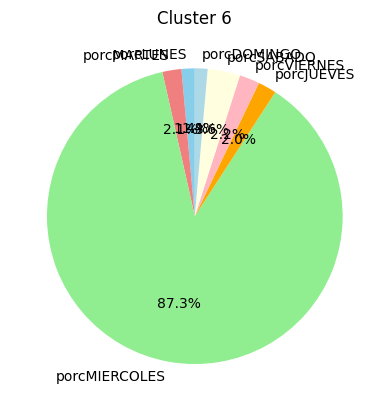

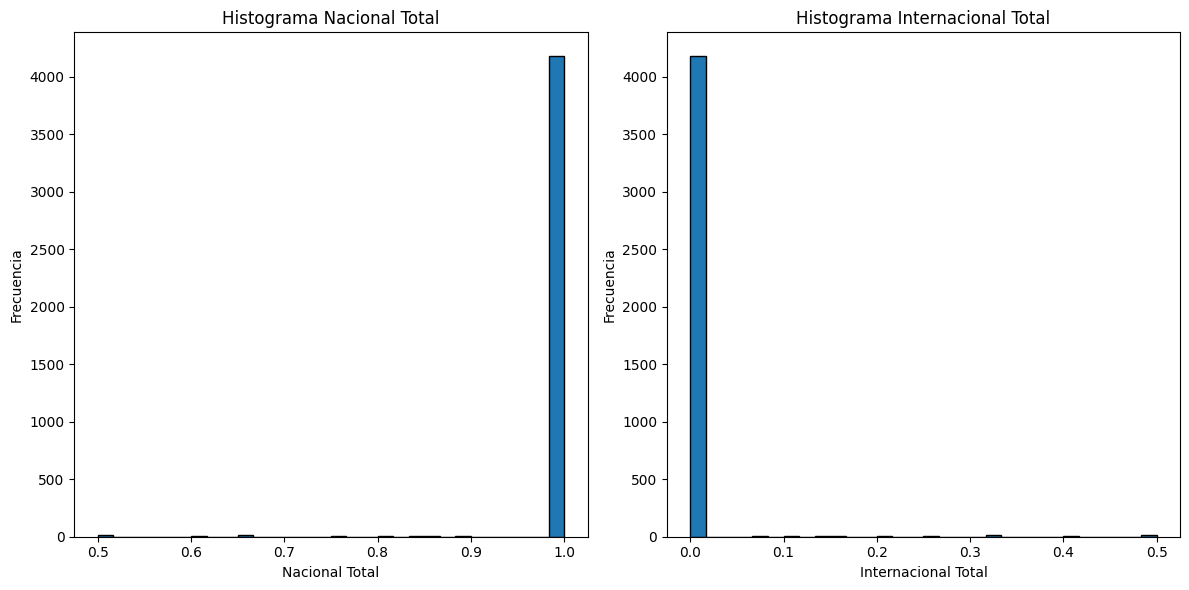

In [35]:
#Promedio de Uso de TC por Día de la Semana para el cluster 1
columnas_dias = ['porcLUNES', 'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES', 'porcSABADO','porcDOMINGO']
dias6 = cluster6[columnas_dias]

# Calcular el promedio de uso para cada día
promedio_dias = dias6.mean()
plt.pie(promedio_dias, labels=promedio_dias.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink', 'lightyellow', 'lightblue'])
plt.title('Cluster 6')

# Mostrar el gráfico
plt.show()

plt.figure(figsize=(12, 6))

# Subgráfico 1
plt.subplot(121)
plt.hist(cluster6['porcentaje_nacional_total'], bins=30, edgecolor='black')
plt.xlabel('Nacional Total')
plt.ylabel('Frecuencia')
plt.title('Histograma Nacional Total')

# Subgráfico 2
plt.subplot(122)
plt.hist(cluster6['porcentaje_internacional_total'], bins=30, edgecolor='black')
plt.xlabel('Internacional Total')
plt.ylabel('Frecuencia')
plt.title('Histograma Internacional Total')

plt.tight_layout()
plt.show()

In [47]:
cluster6.describe()

,Numero_de_transacciones,promedio_por_transaccion,desviacion_estandar_por_transaccion,porcentaje_visa_nacional,porcentaje_mastercard_nacional,Porcentaje_otrafranquicia_nacional,porcentaje_nacional_total,porcentaje_internacional_total,porcentaje_manana,porcentaje_tarde,porcentaje_noche,porcDOMINGO,porcLUNES,porcMARTES,porcMIERCOLES,porcJUEVES,porcVIERNES,porcSABADO
count,4246.000000,4.246000e+03,4.246000e+03,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000
mean,2.351861,4.279456e+05,8.896406e+04,0.420945,0.563362,0.010883,0.995191,0.004809,0.298283,0.599067,0.102650,0.013901,0.014476,0.020799,0.873111,0.020240,0.021951,0.035521
std,2.383904,6.839828e+05,2.311700e+05,0.436674,0.438265,0.094073,0.041401,0.041401,0.410655,0.438674,0.272123,0.062477,0.060733,0.084554,0.196880,0.080936,0.086470,0.113095
min,1.000000,4.020000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000
25%,1.000000,8.490000e+04,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000
50%,1.000000,1.859082e+05,0.000000e+00,0.333333,0.628289,0.000000,1.000000,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,4.500000e+05,7.021395e+04,1.000000,1.000000,0.000000,1.000000,0.000000,0.600000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,29.000000,5.736508e+06,3.832519e+06,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,0.500000


**Cluster 7**

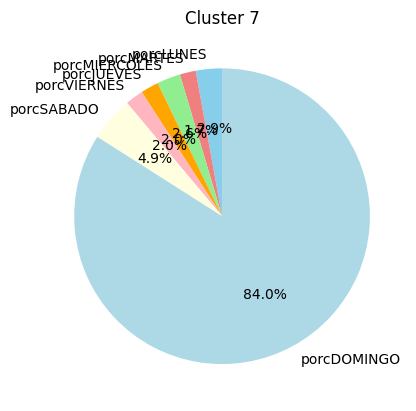

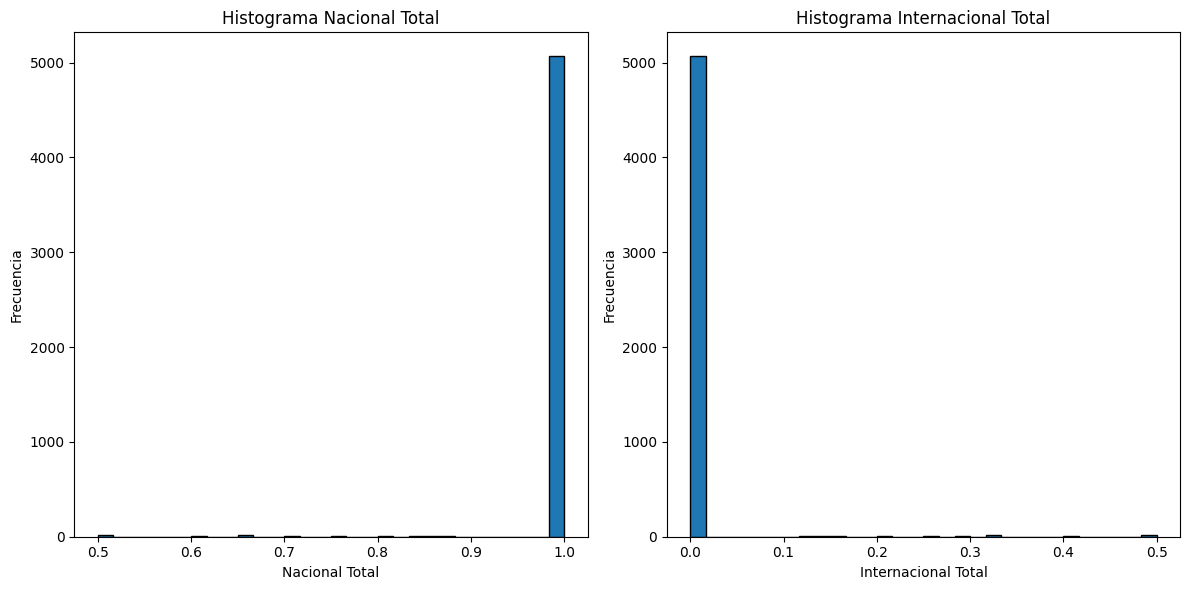

In [39]:
#Promedio de Uso de TC por Día de la Semana para el cluster 1
columnas_dias = ['porcLUNES', 'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES', 'porcSABADO','porcDOMINGO']
dias7 = cluster7[columnas_dias]

# Calcular el promedio de uso para cada día
promedio_dias = dias7.mean()
plt.pie(promedio_dias, labels=promedio_dias.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink', 'lightyellow', 'lightblue'])
plt.title('Cluster 7')

# Mostrar el gráfico
plt.show()

plt.figure(figsize=(12, 6))

# Subgráfico 1
plt.subplot(121)
plt.hist(cluster7['porcentaje_nacional_total'], bins=30, edgecolor='black')
plt.xlabel('Nacional Total')
plt.ylabel('Frecuencia')
plt.title('Histograma Nacional Total')

# Subgráfico 2
plt.subplot(122)
plt.hist(cluster7['porcentaje_internacional_total'], bins=30, edgecolor='black')
plt.xlabel('Internacional Total')
plt.ylabel('Frecuencia')
plt.title('Histograma Internacional Total')

plt.tight_layout()
plt.show()

In [48]:
cluster7.describe()

,Numero_de_transacciones,promedio_por_transaccion,desviacion_estandar_por_transaccion,porcentaje_visa_nacional,porcentaje_mastercard_nacional,Porcentaje_otrafranquicia_nacional,porcentaje_nacional_total,porcentaje_internacional_total,porcentaje_manana,porcentaje_tarde,porcentaje_noche,porcDOMINGO,porcLUNES,porcMARTES,porcMIERCOLES,porcJUEVES,porcVIERNES,porcSABADO
count,5146.000000,5.146000e+03,5.146000e+03,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000
mean,2.783327,2.552267e+05,6.513149e+04,0.393323,0.593623,0.008598,0.995545,0.004455,0.243255,0.686303,0.070442,0.840214,0.028558,0.017482,0.025787,0.019591,0.019705,0.048662
std,3.205965,3.857577e+05,1.582525e+05,0.423236,0.423752,0.077482,0.038750,0.038750,0.373774,0.402243,0.221939,0.216559,0.097142,0.073823,0.093874,0.079391,0.079119,0.126213
min,1.000000,3.900000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.873162e+04,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.400000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.336000e+05,7.071060e+03,0.250000,0.666667,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.681704e+05,6.234899e+04,1.000000,1.000000,0.000000,1.000000,0.000000,0.500000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,47.000000,5.639084e+06,2.356412e+06,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.538462
